In [53]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [54]:
df = pd.read_csv('filtered_data.csv')
x = np.array(df.drop(['Arrhythmia'], axis=1))
y = np.array(df['Arrhythmia'])

In [55]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [56]:
rfc = RandomForestClassifier(n_jobs=2, max_depth=6, min_samples_leaf=30, max_features=10, n_estimators=60)
rfc.fit(x_train, y_train)
y_preds = rfc.predict(x_test)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, classification_report

In [58]:
from sklearn.metrics import ConfusionMatrixDisplay

In [59]:
cf_mat = confusion_matrix(y_test, y_preds)
cf_mat

array([[222,  28],
       [119,  49]], dtype=int64)

In [202]:
cf_mat_export = pd.DataFrame(confusion_matrix(y_test, y_preds))
cf_mat_export.to_csv('confusion_matrix.csv')

In [60]:
disp = ConfusionMatrixDisplay(confusion_matrix=cf_mat, display_labels=rfc.classes_)

In [61]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'Confusion Matrix')

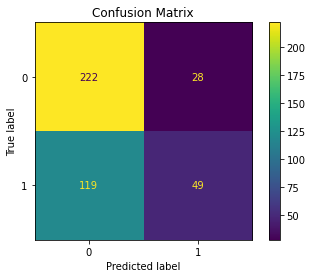

In [62]:
disp.plot()
plt.title('Confusion Matrix')

In [75]:
import seaborn as sns

<AxesSubplot:>

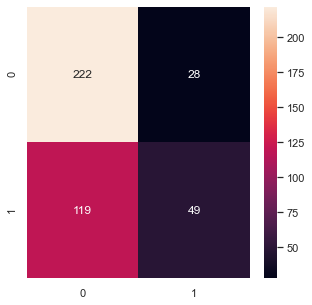

In [90]:
sns.set_theme()
plt.rcParams['figure.figsize'] = [5, 5]
sns.heatmap(cf_mat, annot=True, fmt='.0f')

<AxesSubplot:>

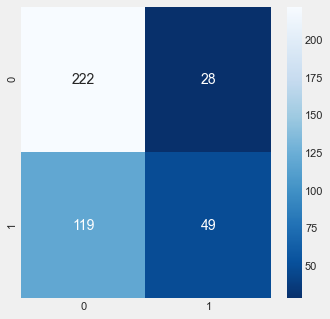

In [100]:
plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [5, 5]
sns.heatmap(cf_mat, annot=True, fmt='.0f', cmap='Blues_r')

<AxesSubplot:>

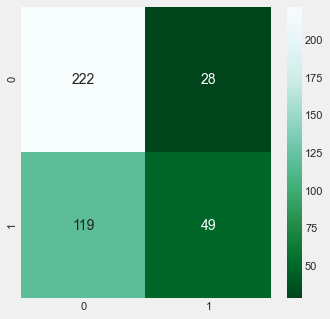

In [104]:
sns.heatmap(cf_mat, annot=True, fmt='.0f', cmap='BuGn_r')

<AxesSubplot:>

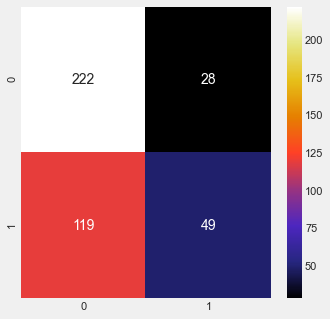

In [106]:
sns.heatmap(cf_mat, annot=True, fmt='.0f', cmap='CMRmap')

<AxesSubplot:>

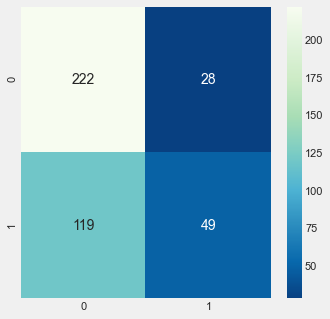

In [109]:
sns.heatmap(cf_mat, annot=True, fmt='.0f', cmap='GnBu_r')

Text(40.1, 0.5, 'Actual Value')

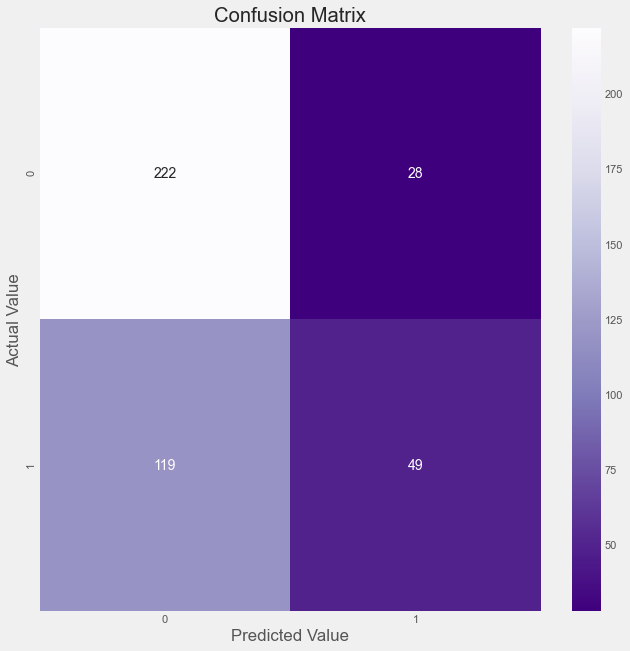

In [232]:
sns.heatmap(cf_mat, annot=True, fmt='.0f', cmap='Purples_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

Text(40.1, 0.5, 'Actual Value')

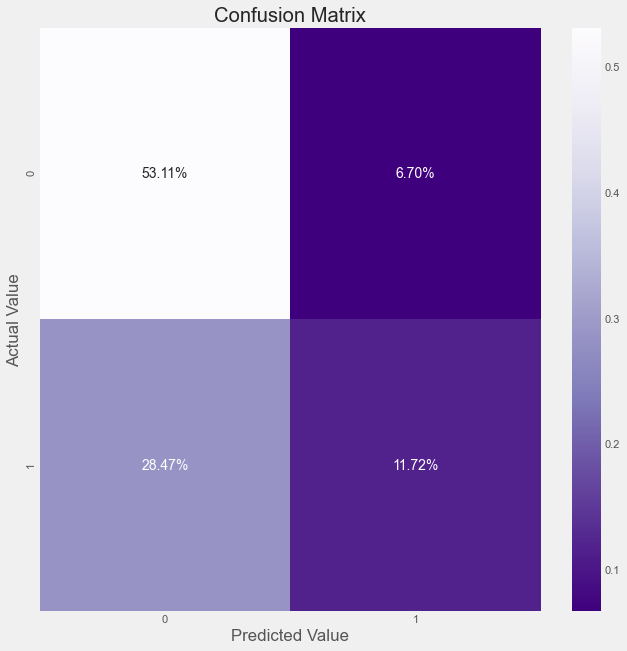

In [233]:
sns.heatmap(cf_mat/np.sum(cf_mat), annot=True, fmt='.2%', cmap='Purples_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

Text(40.1, 0.5, 'Actual Value')

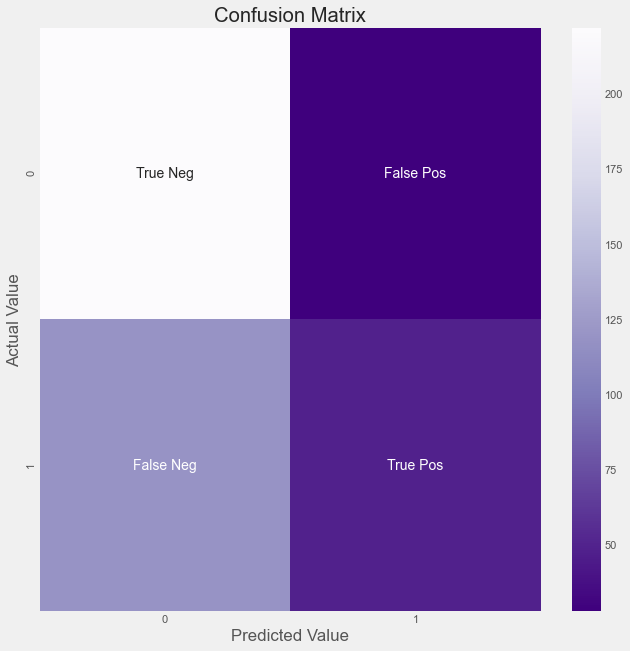

In [221]:
labels = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_mat, annot = labels, fmt = '', cmap = 'Purples_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

array([['True Neg\n222\n53.11%', 'False Pos\n28\n6.70%'],
       ['False Neg\n119\n28.47%', 'True Pos\n49\n11.72%']], dtype='<U20')

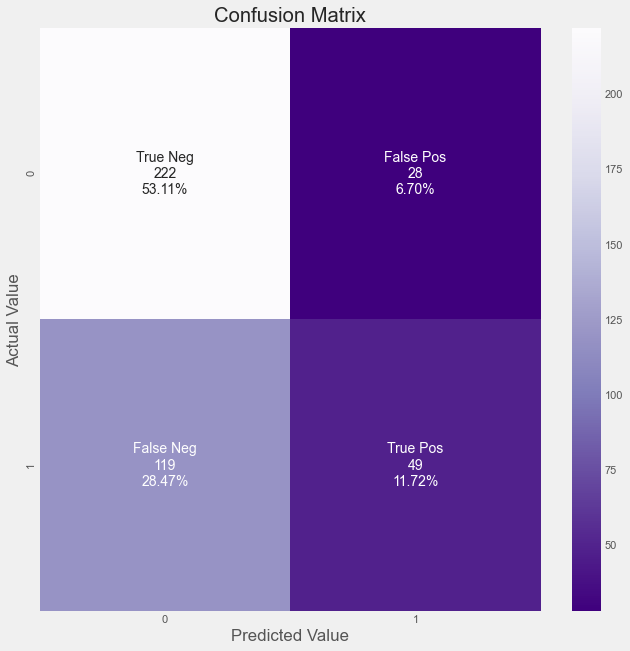

In [228]:
plt.rcParams['figure.figsize'] = [10, 10]
plt.style.use('fivethirtyeight')
group_names = ['True Neg', 'False Pos', 'False Neg', 'True Pos']
group_counts = ["{0:0.0f}".format(value) for value in cf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mat.flatten()/np.sum(cf_mat)]
labels = [f'{v1}\n{v2}\n{v3}' for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_mat, annot=labels, fmt='', cmap='Purples_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')
labels

Text(40.1, 0.5, 'Actual Value')

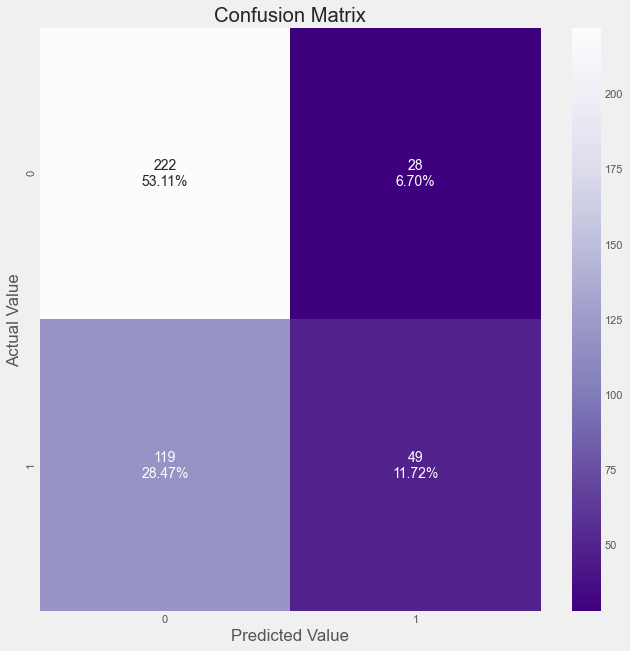

In [231]:
group_counts = ["{0:0.0f}".format(value) for value in cf_mat.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in cf_mat.flatten()/np.sum(cf_mat)]
labels2 = [f'{v1}\n{v2}' for v1, v2 in zip(group_counts, group_percentages)]
labels2 = np.asarray(labels).reshape(2,2)
labels2
sns.heatmap(cf_mat, annot=labels2, fmt='', cmap='Purples_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Value')
plt.ylabel('Actual Value')

<AxesSubplot:>

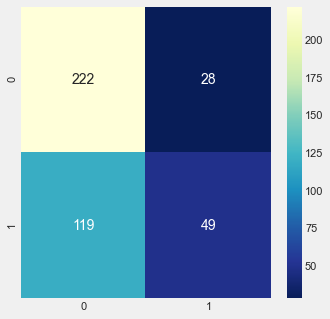

In [144]:
sns.heatmap(cf_mat, annot=True, fmt='.0f', cmap='YlGnBu_r')

<AxesSubplot:>

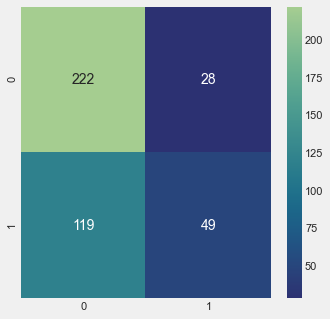

In [157]:
sns.heatmap(cf_mat, annot=True, fmt='.0f', cmap='crest_r')

<AxesSubplot:>

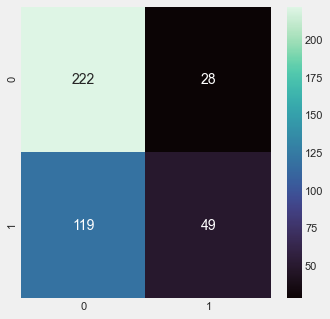

In [179]:
sns.heatmap(cf_mat, annot=True, fmt='.0f', cmap='mako')

<AxesSubplot:>

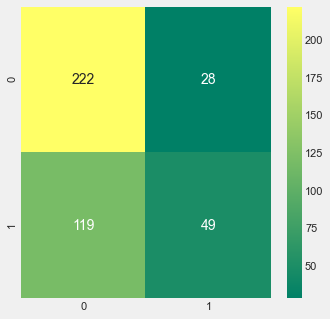

In [189]:
sns.heatmap(cf_mat, annot=True, fmt='.0f', cmap='summer')

<AxesSubplot:>

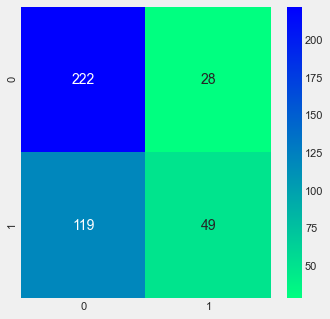

In [201]:
sns.heatmap(cf_mat, annot=True, fmt='.0f', cmap='winter_r')

In [63]:
classification_report(y_test, y_preds, output_dict=True)

{'0': {'precision': 0.6510263929618768,
  'recall': 0.888,
  'f1-score': 0.751269035532995,
  'support': 250},
 '1': {'precision': 0.6363636363636364,
  'recall': 0.2916666666666667,
  'f1-score': 0.4,
  'support': 168},
 'accuracy': 0.6483253588516746,
 'macro avg': {'precision': 0.6436950146627566,
  'recall': 0.5898333333333333,
  'f1-score': 0.5756345177664974,
  'support': 418},
 'weighted avg': {'precision': 0.6451332276305265,
  'recall': 0.6483253588516746,
  'f1-score': 0.6100891360843271,
  'support': 418}}

In [203]:
class_rep_export = pd.DataFrame(classification_report(y_test, y_preds, output_dict=True))
class_rep_export.to_csv('classification_report.csv')

In [64]:
accuracy_score(y_test, y_preds)

0.6483253588516746

In [65]:
precision_score(y_test, y_preds)

0.6363636363636364

In [66]:
recall_score(y_test, y_preds)

0.2916666666666667

In [67]:
f1_score(y_test, y_preds)

0.4

In [68]:
list(y_preds).count(0)

341

In [69]:
list(y_test).count(0)

250